 ## **Analyses et visualisations - Getaround project**

In [ ]:
#Import des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go



In [ ]:
# Chargement des données
df_price = pd.read_csv('/content/get_around_pricing_project.csv')
df_delay = pd.read_excel('/content/get_around_delay_analysis.xlsx', engine='openpyxl')

NameError: name 'pd' is not defined

# Première partie - "Delay_analysis"

In [ ]:
# Affichage des premières lignes
print("Premières lignes de df_delay:")
display(df_delay.head())

Premières lignes de df_delay:


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
0,505000,363965,mobile,canceled,NaN,NaN,NaN
1,507750,269550,mobile,ended,-81.0,NaN,NaN
2,508131,359049,connect,ended,70.0,NaN,NaN
3,508865,299063,connect,canceled,NaN,NaN,NaN
4,511440,313932,mobile,ended,NaN,NaN,NaN


In [ ]:
# Exploration initiale
print("Nombre de lignes et colonnes dans df_delay:", df_delay.shape)

Nombre de lignes et colonnes dans df_delay: (21310, 7)


In [ ]:
# Statistiques descriptives
print("Statistiques descriptives pour df_delay:")
df_delay.describe(include='all')


Statistiques descriptives pour df_delay:


,rental_id,car_id,checkin_type,state,delay_at_checkout_in_minutes,previous_ended_rental_id,time_delta_with_previous_rental_in_minutes
count,21310.000000,21310.000000,21310,21310,16346.000000,1841.000000,1841.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN
top,NaN,NaN,mobile,ended,NaN,NaN,NaN
freq,NaN,NaN,17003,18045,NaN,NaN,NaN
mean,549712.880338,350030.603426,NaN,NaN,59.701517,550127.411733,279.288430
std,13863.446964,58206.249765,NaN,NaN,1002.561635,13184.023111,254.594486
min,504806.000000,159250.000000,NaN,NaN,-22433.000000,505628.000000,0.000000
25%,540613.250000,317639.000000,NaN,NaN,-36.000000,540896.000000,60.000000
50%,550350.000000,368717.000000,NaN,NaN,9.000000,550567.000000,180.000000
75%,560468.500000,394928.000000,NaN,NaN,67.000000,560823.000000,540.000000


In [ ]:
# Pourcentage de valeurs manquantes
print("Pourcentage de valeurs manquantes pour df_delay:")
display(100 * df_delay.isnull().sum() / df_delay.shape[0])


Pourcentage de valeurs manquantes pour df_delay:


rental_id                                      0.000000
car_id                                         0.000000
checkin_type                                   0.000000
state                                          0.000000
delay_at_checkout_in_minutes                  23.294228
previous_ended_rental_id                      91.360863
time_delta_with_previous_rental_in_minutes    91.360863
dtype: float64

On observe ici un grand nombre de valeurs manquantes pour *delay_at_checkout_in_minutes* : 23%, *previous_ended_rental_id *  : 91% et *time_delta_with_previous_rental_in_minutes* : 91%.

Les chiffres sont élevés mais en regardant bien ce n'est pas alarmant car cela peut correspondre à des **locations isolées** ainsi il n'y a pas de données sur les prochaines locations ce qui est normal.

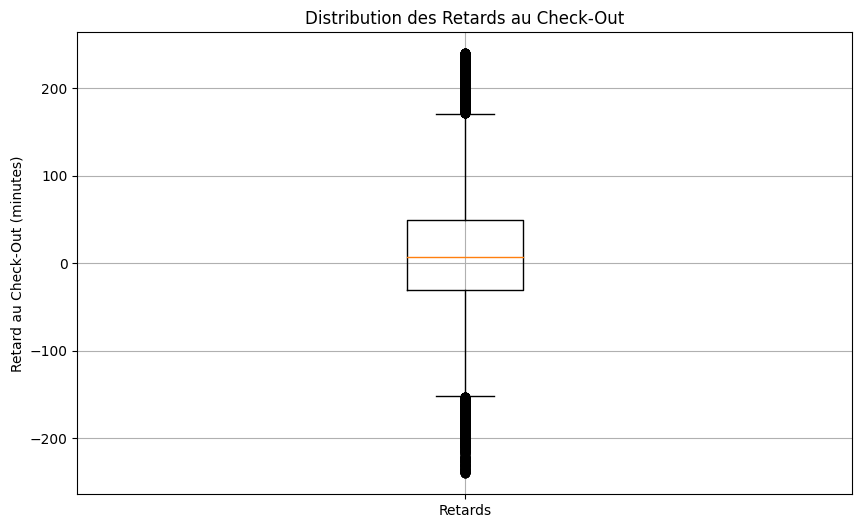

In [ ]:
#boxplot distribution des retards au check out
df_delay_filtered = df_delay[df_delay['delay_at_checkout_in_minutes'].between(-240, 240)]


plt.figure(figsize=(10, 6))
plt.boxplot(df_delay_filtered['delay_at_checkout_in_minutes'].dropna())
plt.title("Distribution des Retards au Check-Out")
plt.ylabel("Retard au Check-Out (minutes)")
plt.xticks([1], ['Retards'])
plt.grid(True)
plt.show()

La ligne orange nous indique ici qu'en moyenne les retards sont plutôt courts (situés autour de 10 minutes).

Les retards situés en dessous de 0 ne sont pas des retards mais voitures rendues en avance, au dessus de 0 le retard commence.

In [ ]:
# Distribution du temps jusqu'au prochain check-in

df_filtered = df_delay[df_delay['time_delta_with_previous_rental_in_minutes'].between(0, 1440)]

# Créer un graphique de densité
fig = px.density_contour(df_filtered, x='time_delta_with_previous_rental_in_minutes',
                         marginal_x='histogram',
                         title="Distribution continue du temps jusqu'au prochain check-in")

fig.update_layout(xaxis_title="Temps jusqu'au prochain check-in (minutes)",
                  yaxis_title="Densité",

                  plot_bgcolor="white")

# ligne de seuil hypothétique à 200
fig.add_vline(x=200, line_width=2, line_dash="dash", line_color="purple",
              annotation_text="Seuil de 200 min", annotation_position="top right")


fig.show()


NameError: name 'df_delay' is not defined

In [ ]:
# Retard au check-out et délai jusq'au check-in
fig = px.scatter(df_delay_filtered, x='delay_at_checkout_in_minutes', y='time_delta_with_previous_rental_in_minutes',
                 title="Relation entre le Retard au Check-Out et le Temps jusqu'au Prochain Check-In",
                 labels={'delay_at_checkout_in_minutes': 'Retard au Check-Out (minutes)', 'time_delta_with_previous_rental_in_minutes': 'Temps jusqu\'au Prochain Check-In (minutes)'},
                 trendline="ols",
                 opacity=0.5)

fig.update_traces(marker=dict(size=5))
fig.update_layout(xaxis_title="Retard au Check-Out (minutes)", yaxis_title="Temps jusqu'au Prochain Check-In (minutes)")
fig.show()

In [ ]:
# Proportions locations annulées
fig = px.pie(df_delay, names='state', title="Proportion des états de la location",
             color_discrete_sequence=px.colors.qualitative.Set2,
             hole=0.4)


# Afficher le label et le pourcentage
fig.update_traces(textinfo='percent+label')

pull_values = [0.05 if i == df_delay['state'].value_counts().idxmin() else 0 for i in range(df_delay['state'].nunique())]

fig.update_traces(textinfo='percent+label', pull=pull_values)

# Mise en beauté et réglages du layout
fig.update_layout(legend=dict(
                                title="Légende:",
                                orientation="h",
                                yanchor="bottom",
                                y=-0.15,
                                xanchor="center",
                                x=0.5
                            ),
                  plot_bgcolor="white")

fig.show()

NameError: name 'px' is not defined

In [ ]:
# Proportion de locations annulées par type de Check-In
fig = px.sunburst(df_delay.groupby(['state', 'checkin_type'], as_index=False).size(), path=['state', 'checkin_type'], values='size', title="Proportion de locations annulées par type de Check-In")
fig.update_traces(textinfo="label+percent parent")
fig.show()


NameError: name 'px' is not defined

In [ ]:
# Initialiser toutes les locations comme étant 'In time' et catégoriser les retards
df_delay['delay_repartition'] = 'In time'
df_delay.loc[(df_delay['delay_at_checkout_in_minutes'] > 0) & (df_delay['checkin_type'] == 'mobile'), 'delay_repartition'] = 'Mobile and late'
df_delay.loc[(df_delay['delay_at_checkout_in_minutes'] > 0) & (df_delay['checkin_type'] == 'connect'), 'delay_repartition'] = 'Connect and late'

# Calcul du pourcentage de retards par Type de Check-In
Late_perc_mobile = df_delay.loc[(df_delay['checkin_type'] == 'mobile') & (df_delay['delay_at_checkout_in_minutes'] > 0)].shape[0] / df_delay.loc[df_delay['checkin_type'] == 'mobile'].shape[0] * 100
Late_perc_connect = df_delay.loc[(df_delay['checkin_type'] == 'connect') & (df_delay['delay_at_checkout_in_minutes'] > 0)].shape[0] / df_delay.loc[df_delay['checkin_type'] == 'connect'].shape[0] * 100


# Afficher les résultats importants
print(f"Pourcentage de retards avec check-in mobile: {Late_perc_mobile:.2f}%")
print(f"Pourcentage de retards avec check-in connect: {Late_perc_connect:.2f}%")

NameError: name 'df_delay' is not defined

In [ ]:
# Délai moyen du retard par type de check-in
# Filtrer pour inclure uniquement les retards (delay_at_checkout_in_minutes > 0)
df_delay_with_late_checkouts = df_delay[df_delay['delay_at_checkout_in_minutes'] > 0]

# Calculer la moyenne des retards par type de check-in
avg_delay_by_checkin_type = df_delay_with_late_checkouts.groupby('checkin_type')['delay_at_checkout_in_minutes'].mean().reset_index()

# Affichage du DataFrame calculé
print(avg_delay_by_checkin_type)


  checkin_type  delay_at_checkout_in_minutes
0      connect                     80.109664
1       mobile                    224.136816


In [ ]:
# Pourcentage de retard par type de check-in

fig = go.Figure(data=[
    go.Bar(name='Mobile', x=['Check-in Mobile'], y=[Late_perc_mobile], marker_color=px.colors.qualitative.Set2[0]),
    go.Bar(name='Connecté', x=['Check-in Connect'], y=[Late_perc_connect], marker_color=px.colors.qualitative.Set2[1])
])

fig.update_layout(
    title='Pourcentage de Retard par Type de Check-in',
    xaxis=dict(title='Type de Check-in'),
    yaxis=dict(title='Pourcentage de Retard'),
    plot_bgcolor='white',
    bargap=0.5
)

fig.show()


NameError: name 'go' is not defined

In [ ]:
# Graphique du délai moyen du retard par type de check-in

color_map = {
    'mobile': px.colors.qualitative.Set2[0],
    'connecté': px.colors.qualitative.Set2[1],
}

fig = px.bar(avg_delay_by_checkin_type,
             x='checkin_type',
             y='delay_at_checkout_in_minutes',
             labels={'checkin_type': 'Type de Check-in', 'delay_at_checkout_in_minutes': 'Retard moyen au check-out (minutes)'},
             title="Retard moyen au check-out par type de check-in",
             color='checkin_type',
             color_discrete_map=color_map)

fig.update_layout(xaxis_title="Type de Check-in",
                  yaxis_title="Retard moyen (minutes)",
                  plot_bgcolor="white")

fig.show()

In [ ]:
#Impact du retard de check-out sur le check-in

# Calculer 'late_checkin'
df_delay['late_checkin'] = (df_delay['delay_at_checkout_in_minutes'] > df_delay['time_delta_with_previous_rental_in_minutes']).astype(int)
df_delay['late_checkin_text'] = df_delay['late_checkin'].map({1: 'Impact du retard précédent', 0: 'Sans impact du retard précédent'})

# Vérifier les NaNs
df_delay['checkin_type'] = df_delay['checkin_type'].fillna('Inconnu')
grouped_data = df_delay.groupby(['late_checkin_text', 'checkin_type'], as_index=False).size()
grouped_data = grouped_data.rename(columns={0: 'size'})
grouped_data['category'] = grouped_data['late_checkin_text'] + " - " + grouped_data['checkin_type']

custom_colors = {
    'Impact du retard précédent - mobile': 'red',
    'Impact du retard précédent - connecté': 'darkorange',
    'Sans impact du retard précédent - mobile': 'Darkcyan',
    'Sans impact du retard précédent - connecté': 'cyan'
}

fig = px.pie(grouped_data, names='category', values='size',
             title="Proportion de check-in tardifs selon le type de check-in",
             color='category',
             color_discrete_map=custom_colors)


fig.update_traces(textinfo='percent+label')
fig.update_layout(title={'text': "Impact du retard de check-out sur le check-in ", 'y':0.95, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'},
                  autosize=True,
                  title_font_color="black")

fig.show()


NameError: name 'df_delay' is not defined

In [ ]:
df_loc_consecutive = pd.merge(df_delay, df_delay, how='inner', left_on='previous_ended_rental_id', right_on='rental_id', suffixes=('', '_prev'))

# Nettoyage et renommage des colonnes
df_loc_consecutive = df_loc_consecutive.rename(columns={
    'delay_at_checkout_in_minutes': 'current_delay',
    'delay_at_checkout_in_minutes_prev': 'previous_delay',
    'checkin_type': 'current_checkin_type',
    'checkin_type_prev': 'previous_checkin_type',
    'state': 'current_state',
    'state_prev': 'previous_state'
})

# Calcul du 'real_delay_between_loc_in_min'
df_loc_consecutive['real_delay_between_loc_in_min'] = df_loc_consecutive['time_delta_with_previous_rental_in_minutes'] - df_loc_consecutive['previous_delay']




NameError: name 'pd' is not defined

In [ ]:
# Calcul de pourcentages

#  Nombre de locations impactées par un retard
df_impacted_loc = df_loc_consecutive[df_loc_consecutive['real_delay_between_loc_in_min'] < 0]

#  Nombre de locations annulées avec retard
df_impacted_canceled_loc = df_impacted_loc[df_impacted_loc['current_state'] == 'canceled']

# Locations non impactées par un retard
df_non_impacted_loc = df_loc_consecutive[df_loc_consecutive['real_delay_between_loc_in_min'] >= 0]

# Total de locations annulées
total_cancel = len(df_loc_consecutive[df_loc_consecutive['current_state'] == 'canceled'])

# Locations annulées qui n'ont pas été impactées par un retard
no_late_cancel = len(df_non_impacted_loc[df_non_impacted_loc['current_state'] == 'canceled'])

# Calcul des pourcentages
perc_cancellations_no_apparent_reason = (no_late_cancel / len(df_non_impacted_loc)) * 100 if len(df_non_impacted_loc) > 0 else 0
perc_cancellations_when_late = (len(df_impacted_canceled_loc) / len(df_impacted_loc)) * 100 if len(df_impacted_loc) > 0 else 0

print(f'Nombre de locations impactées: {len(df_impacted_loc)}')
print(f'Nombre de locations annulées présentant un retard: {len(df_impacted_canceled_loc)}')
print(f"Pourcentage d'annulations sans raisons apparentes: {perc_cancellations_no_apparent_reason:.2f}%")
print(f"Pourcentage de locations annulées lors de retard: {perc_cancellations_when_late:.2f}%")

NameError: name 'df_loc_consecutive' is not defined

In [ ]:
# Calcul des proportions
proportion_annulations_due_to_delay = (len(df_impacted_canceled_loc) / total_cancel) * 100
proportion_annulations_other_reasons = ((total_cancel - len(df_impacted_canceled_loc)) / total_cancel) * 100


NameError: name 'df_impacted_canceled_loc' is not defined

In [ ]:
# Graphique des raisons d'annulation
labels = ['Annulations pour Autres Raisons', 'Annulations suite à des Retards']
values = [proportion_annulations_other_reasons, proportion_annulations_due_to_delay]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0.2])])
fig.update_traces(textinfo='percent+label')
fig.update_layout(title_text="Proportion des locations annulées: Générales vs. suite à des retards")

fig.show()


NameError: name 'proportion_annulations_other_reasons' is not defined

In [ ]:
# Visualisation des retards
# Catégoriser les locations basées sur leur état d'annulation ou non
df_loc_consecutive['Canceled'] = df_loc_consecutive['current_state'].apply(lambda x: 'Annulée' if x == 'canceled' else 'Non annulée')

# Filtre
df_filtered = df_loc_consecutive[df_loc_consecutive['real_delay_between_loc_in_min'].between(-300, 0)]

# Graphique
fig = px.histogram(df_filtered, x='real_delay_between_loc_in_min', color='Canceled',
                   barmode='group',
                   title="Distribution des Retards Impactant les Locations Suivantes",
                   labels={'real_delay_between_loc_in_min': 'Délai jusqu’à la prochaine location (minutes)'})

fig.update_layout(xaxis_title='Délai jusqu’à la prochaine location (minutes)',
                  yaxis_title='Nombre de Locations',
                  legend_title="État de la Location",
                  legend=dict(orientation='h', yanchor='bottom', y=-0.25, xanchor='center', x=0.5))

fig.show()


NameError: name 'df_loc_consecutive' is not defined

In [ ]:
# Visualisation de la courbe d'impact pour définir le seuil (nombre de rétards évités selon le seuil)
def simulate_threshold(max_threshold, df_loc_consecutive):
    late_avoided = []

    # Treshhold
    thresholds = list(range(0, max_threshold, 20))  # Génère les seuils de 0 à max_threshold par pas de 20

    for threshold in thresholds:
        # Ajustement du temps delta avec le seuil
        adjusted_time_deltas = df_loc_consecutive['time_delta_with_previous_rental_in_minutes'].apply(lambda x: max(x, threshold))

        # Calculer les retards évités en comparant le seuil ajusté au retard précédent
        adjusted_real_delay = adjusted_time_deltas - df_loc_consecutive['previous_delay']

        # Nombre de cas où le retard aurait été évité grâce au seuil
        late_avoided_count = (adjusted_real_delay >= 0).sum()

        late_avoided.append(late_avoided_count)

    return late_avoided, thresholds



In [ ]:
late_avoided, thresholds = simulate_threshold(400, df_loc_consecutive)

# Création du graphique
fig = px.line(x=thresholds, y=late_avoided, labels={'x':'Valeur du Seuil (min)', 'y':'Retards Évités'},
              title='Impact du Seuil sur les Retards Évités')
fig.update_traces(mode='lines+markers')
fig.update_layout(title={'y':0.9, 'x':0.5, 'xanchor': 'center', 'yanchor': 'top'})

fig.show()



Avec ces différentes analyses nous choisissons le seuil de 180.

# Deuxième Partie - "Price_Analysis"

In [ ]:
# Affichage des premières lignes
print("Premières lignes de df_price:")
display(df_price.head())

Premières lignes de df_price:


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


In [ ]:
# Exploration initiale
print("Nombre de lignes et colonnes dans df_price:", df_price.shape)

Nombre de lignes et colonnes dans df_price: (4843, 15)


In [ ]:
# Statistiques descriptives
print("Statistiques descriptives pour df_price:")
df_price.describe(include='all')


Statistiques descriptives pour df_price:


,Unnamed: 0,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843.000000,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,NaN,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,NaN,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,NaN,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,2421.000000,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,1398.198007,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,0.000000,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,1210.500000,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,2421.000000,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,3631.500000,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


In [ ]:
# Pourcentage de valeurs manquantes
print("Pourcentage de valeurs manquantes pour df_price:")
display(100 * df_price.isnull().sum() / df_price.shape[0])

Pourcentage de valeurs manquantes pour df_price:


Unnamed: 0                   0.0
model_key                    0.0
mileage                      0.0
engine_power                 0.0
fuel                         0.0
paint_color                  0.0
car_type                     0.0
private_parking_available    0.0
has_gps                      0.0
has_air_conditioning         0.0
automatic_car                0.0
has_getaround_connect        0.0
has_speed_regulator          0.0
winter_tires                 0.0
rental_price_per_day         0.0
dtype: float64

In [ ]:
# Suppression de colonnes non pertinentes
df_price.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
# Identification du nombre de modèle par marque
df_price['model_key'].value_counts()

Citroën        969
Renault        916
BMW            827
Peugeot        642
Audi           526
Nissan         275
Mitsubishi     231
Mercedes        97
Volkswagen      65
Toyota          53
SEAT            46
Subaru          44
Opel            33
Ferrari         33
PGO             33
Maserati        18
Suzuki           8
Porsche          6
Ford             5
KIA Motors       3
Alfa Romeo       3
Fiat             2
Lexus            2
Lamborghini      2
Mini             1
Mazda            1
Honda            1
Yamaha           1
Name: model_key, dtype: int64

In [ ]:
# On va éliminer les marques avec le moins de modèles
threshold = 15
value_counts = df_price['model_key'].value_counts()
to_remove = value_counts[value_counts < threshold].index
df_price = df_price[~df_price['model_key'].isin(to_remove)]

In [ ]:
# Distribution du Prix de Location par Jour
fig = px.histogram(df_price, x='rental_price_per_day', nbins=50, title="Distribution du Prix de Location par Jour")
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
# Relation entre la puissance du moteur et le prix de location
fig = px.scatter(df_price, x='engine_power', y='rental_price_per_day', trendline="ols", title="Puissance du moteur vs. Prix de location")
fig.update_layout(xaxis_title="Puissance du moteur", yaxis_title="puissance moteur et prix de location")
fig.show()

NameError: name 'px' is not defined

In [ ]:
# Relation des caractéristiques avec la variable cible
fig = px.histogram(df_price, x='engine_power', nbins=50, title="Distribution de la puissance du moteur")
fig.show()

fig = px.scatter(df_price, x='mileage', y='rental_price_per_day', title="Prix de location en fonction du kilométrage")
fig.show()



NameError: name 'px' is not defined

<ipython-input-72-0bd73abc2ccd>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



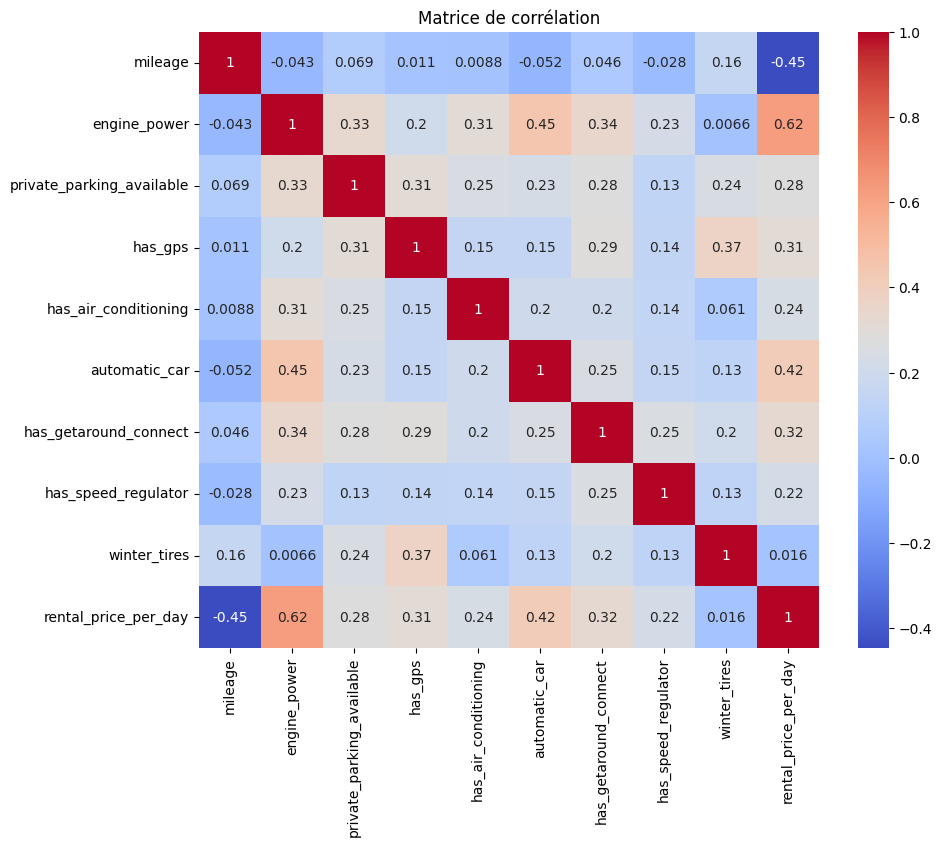

In [ ]:
# Matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(df_price.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()